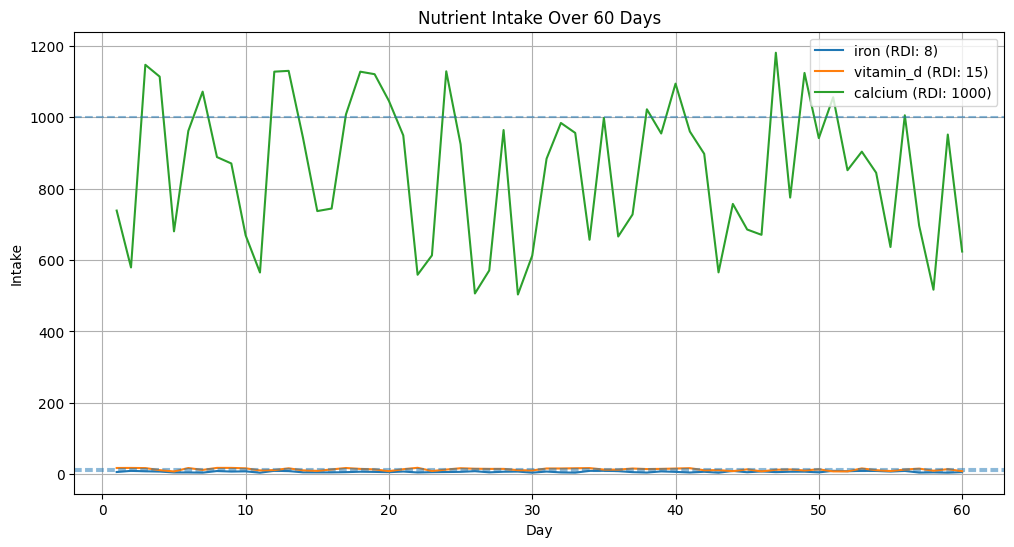

,Disease,Current Risk (%),3-Month Risk (%),6-Month Risk (%),Contributing Deficiencies,Prevention
0,Anemia,74.00,50.00,50.00,"vitamin_b12 (-107.1 vs RDI: 2.4), folate (-404...","Increase vitamin_b12 to 2.9, Increase folate t..."
1,Osteoporosis,69.00,65.00,65.00,"calcium (-59389.6 vs RDI: 1000), vitamin_d (-1...","Increase calcium to 1200.0, Increase vitamin_d..."
2,Pellagra,61.00,60.00,60.00,vitamin_b6 (-73.3 vs RDI: 1.3),Increase vitamin_b6 to 1.6
3,Scurvy,79.00,53.00,53.00,vitamin_c (-3681.4 vs RDI: 90),Increase vitamin_c to 108.0
4,Beriberi,70.00,53.00,53.00,"vitamin_b1 (-23.5 vs RDI: 1.2), vitamin_b6 (-7...","Increase vitamin_b1 to 1.4, Increase vitamin_b..."
5,Hypothyroidism_Goiter,74.00,68.00,68.00,iodine (-1435.2 vs RDI: 150),Increase iodine to 180.0
6,Impaired_Immunity,53.00,58.00,58.00,"zinc (-109.9 vs RDI: 11), vitamin_c (-3681.4 v...","Increase zinc to 13.2, Increase vitamin_c to 1..."
7,Rickets,79.00,68.00,68.00,"vitamin_d (-1022.6 vs RDI: 15), calcium (-5938...","Increase vitamin_d to 18.0, Increase calcium t..."
8,Muscle_Weakness_Cramps,68.00,49.00,49.00,calcium (-59389.6 vs RDI: 1000),Increase calcium to 1200.0
9,Night_Blindness,60.00,47.00,47.00,zinc (-109.9 vs RDI: 11),Increase zinc to 13.2


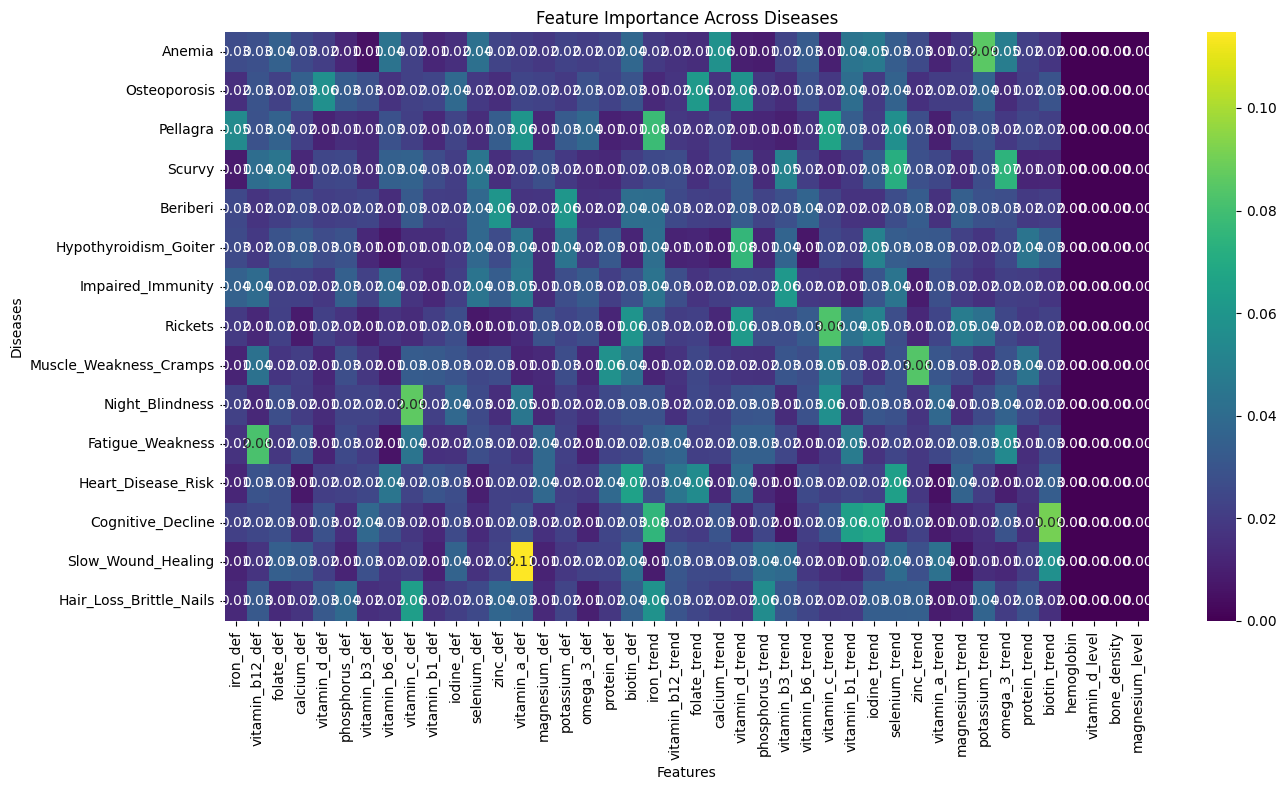


=== PERSONALIZED NUTRITION PLAN ===

Priority Nutrients to Increase:

IRON:
  Current intake: 5.82 (RDI: 8)
  Target intake: 9.60
  Related conditions: Anemia, Scurvy, Fatigue_Weakness, Hair_Loss_Brittle_Nails
  Food sources: Red meat, spinach, lentils, fortified cereals

VITAMIN_B12:
  Current intake: 2.11 (RDI: 2.4)
  Target intake: 2.88
  Related conditions: Anemia, Beriberi, Fatigue_Weakness, Cognitive_Decline
  Food sources: Fish, meat, eggs, dairy products

FOLATE:
  Current intake: 238.51 (RDI: 400)
  Target intake: 480.00
  Related conditions: Anemia
  Food sources: Leafy greens, beans, citrus fruits

CALCIUM:
  Current intake: 623.98 (RDI: 1000)
  Target intake: 1200.00
  Related conditions: Osteoporosis, Rickets, Muscle_Weakness_Cramps
  Food sources: Dairy products, almonds, leafy greens

VITAMIN_D:
  Current intake: 8.40 (RDI: 15)
  Target intake: 18.00
  Related conditions: Osteoporosis, Rickets, Cognitive_Decline
  Food sources: Fatty fish, egg yolks, sunlight exposure



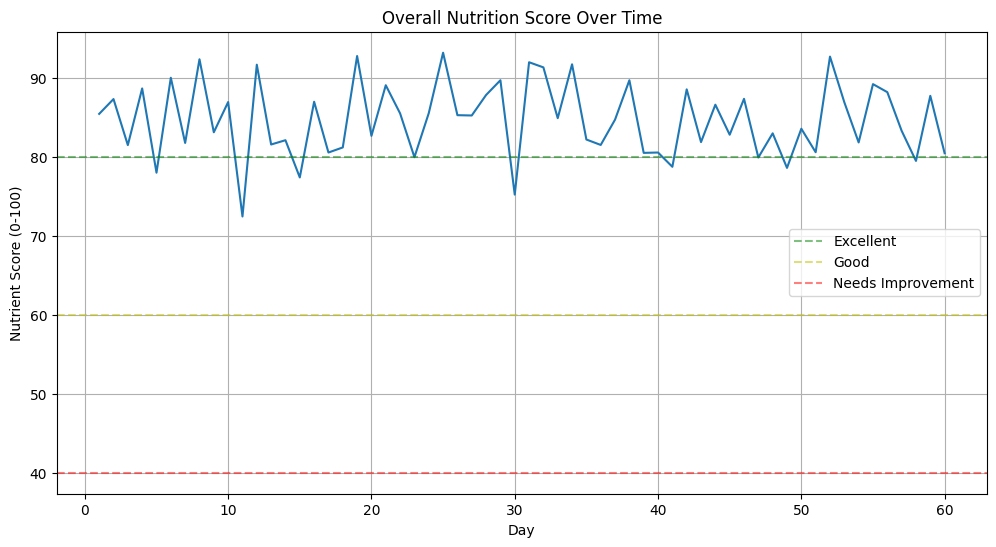


Analysis Complete: Your personalized nutrition risk assessment highlights potential areas for dietary improvements and long-term health optimization.


In [ ]:
# Install required libraries
# !pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# --- Step 1: Simulate Synthetic Data ---
RDI = {
    'iron': 8, 'vitamin_b12': 2.4, 'folate': 400, 'calcium': 1000, 'vitamin_d': 15,
    'phosphorus': 700, 'vitamin_b3': 16, 'vitamin_b6': 1.3, 'vitamin_c': 90,
    'vitamin_b1': 1.2, 'iodine': 150, 'selenium': 55, 'zinc': 11, 'vitamin_a': 900,
    'magnesium': 400, 'potassium': 3400, 'omega_3': 1.6, 'protein': 56, 'biotin': 30
}

disease_nutrients = {
    'Anemia': ['iron', 'vitamin_b12', 'folate'],
    'Osteoporosis': ['calcium', 'vitamin_d', 'phosphorus'],
    'Pellagra': ['vitamin_b3', 'vitamin_b6'],
    'Scurvy': ['vitamin_c', 'iron'],
    'Beriberi': ['vitamin_b1', 'vitamin_b6', 'vitamin_b12'],
    'Hypothyroidism_Goiter': ['iodine', 'selenium'],
    'Impaired_Immunity': ['zinc', 'vitamin_a', 'vitamin_c'],
    'Rickets': ['vitamin_d', 'calcium', 'phosphorus'],
    'Muscle_Weakness_Cramps': ['magnesium', 'potassium', 'calcium'],
    'Night_Blindness': ['vitamin_a', 'zinc'],
    'Fatigue_Weakness': ['iron', 'vitamin_b12', 'magnesium'],
    'Heart_Disease_Risk': ['omega_3', 'magnesium', 'vitamin_b6'],
    'Cognitive_Decline': ['vitamin_b12', 'omega_3', 'vitamin_d'],
    'Slow_Wound_Healing': ['zinc', 'vitamin_c', 'protein'],
    'Hair_Loss_Brittle_Nails': ['biotin', 'iron', 'zinc']
}

np.random.seed(42)
days = 60
nutrients = list(RDI.keys())
diet_data = {nutrient: np.random.uniform(0.5 * RDI[nutrient], 1.2 * RDI[nutrient], days) for nutrient in nutrients}
diet_df = pd.DataFrame(diet_data)
diet_df['day'] = range(1, days + 1)

health_data = {
    'hemoglobin': 13.5, 'vitamin_d_level': 18, 'bone_density': 1.1, 'magnesium_level': 1.8
}
health_df = pd.DataFrame([health_data])

# --- Step 2: Feature Engineering ---
# Create a copy to avoid SettingWithCopyWarning
df = diet_df.copy()

# Add derived features
for nutrient in nutrients:
    df[f'{nutrient}_def'] = df[nutrient] - RDI[nutrient]
    df[f'{nutrient}_avg'] = df[nutrient].rolling(window=30, min_periods=1).mean()
    df[f'{nutrient}_trend'] = df[nutrient].diff().fillna(0) / df['day'].diff().fillna(1)

# Add health metrics to each row
for col in health_data.keys():
    df[col] = health_data[col]

# --- Step 3: Label Data (Ensure Variability) ---
health_thresholds = {
    'hemoglobin': 13, 'vitamin_d_level': 20, 'bone_density': -1, 'magnesium_level': 1.7
}

for disease, disease_nutrients_list in disease_nutrients.items():
    conditions = []
    for nutrient in disease_nutrients_list:
        conditions.append(df[f'{nutrient}_avg'] < RDI[nutrient])

    if disease == 'Anemia':
        conditions.append(df['hemoglobin'] < health_thresholds['hemoglobin'])
    elif disease in ['Osteoporosis', 'Rickets']:
        conditions.append(df['bone_density'] < health_thresholds['bone_density'])
    elif disease in ['Fatigue_Weakness', 'Muscle_Weakness_Cramps']:
        conditions.append(df['magnesium_level'] < health_thresholds['magnesium_level'])

    # Convert list of arrays to a single array with any condition met
    base_condition = np.any(np.column_stack(conditions), axis=1)
    # Introduce randomness to ensure both 0 and 1 labels
    df[disease] = np.where(base_condition & (np.random.rand(days) > 0.3), 1, 0)  # 70% chance of 1 if condition met

# --- Step 4: Train ML Model ---
feature_cols = [f'{nutrient}_def' for nutrient in nutrients] + \
               [f'{nutrient}_trend' for nutrient in nutrients] + \
               list(health_data.keys())
X = df[feature_cols]
y = df[list(disease_nutrients.keys())]

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# --- Step 5: Visualize Data ---
plt.figure(figsize=(12, 6))
for nutrient in ['iron', 'vitamin_d', 'calcium']:
    plt.plot(df['day'], df[nutrient], label=f'{nutrient} (RDI: {RDI[nutrient]})')
    plt.axhline(y=RDI[nutrient], linestyle='--', alpha=0.5)
plt.title('Nutrient Intake Over 60 Days')
plt.xlabel('Day')
plt.ylabel('Intake')
plt.legend()
plt.grid(True)
plt.show()

# --- Step 6: Predict Current and Future Risks ---
current_X = X.iloc[-1:].copy()
current_probs = model.predict_proba(current_X)

# 3 months projection
future_X_3m = current_X.copy()
for nutrient in nutrients:
    trend = future_X_3m[f'{nutrient}_trend'].values[0]
    future_X_3m[f'{nutrient}_def'] = future_X_3m[f'{nutrient}_def'] + trend * 90  # 3 months
future_3m_probs = model.predict_proba(future_X_3m)

# 6 months projection
future_X_6m = future_X_3m.copy()
for nutrient in nutrients:
    trend = future_X_6m[f'{nutrient}_trend'].values[0]
    future_X_6m[f'{nutrient}_def'] = future_X_6m[f'{nutrient}_def'] + trend * 90  # additional 3 months
future_6m_probs = model.predict_proba(future_X_6m)

# --- Step 7: Display Results (Robust Handling) ---
results = []
for i, disease in enumerate(y.columns):
    # Handle variable number of classes in predict_proba
    prob_array = current_probs[i]
    current_risk = prob_array[0, 1] * 100 if prob_array.shape[1] > 1 else prob_array[0, 0] * 100

    prob_array_3m = future_3m_probs[i]
    future_3m_risk = prob_array_3m[0, 1] * 100 if prob_array_3m.shape[1] > 1 else prob_array_3m[0, 0] * 100

    prob_array_6m = future_6m_probs[i]
    future_6m_risk = prob_array_6m[0, 1] * 100 if prob_array_6m.shape[1] > 1 else prob_array_6m[0, 0] * 100

    if current_risk > 20 or future_6m_risk > 20:
        contributing = []
        prevention = []
        for nutrient in disease_nutrients[disease]:
            if future_X_6m[f'{nutrient}_def'].values[0] < 0:
                contributing.append(
                    f"{nutrient} ({future_X_6m[f'{nutrient}_def'].values[0]:.1f} vs RDI: {RDI[nutrient]})"
                )
                prevention.append(
                    f"Increase {nutrient} to {RDI[nutrient] * 1.2:.1f}"
                )

        results.append({
            'Disease': disease,
            'Current Risk (%)': f"{current_risk:.2f}",
            '3-Month Risk (%)': f"{future_3m_risk:.2f}",
            '6-Month Risk (%)': f"{future_6m_risk:.2f}",
            'Contributing Deficiencies': ", ".join(contributing) if contributing else "None",
            'Prevention': ", ".join(prevention) if prevention else "Maintain intake"
        })

results_df = pd.DataFrame(results)
display(HTML("<h3>Disease Risk Predictions</h3>"))
display(results_df)

# --- Step 8: Feature Importance ---
feature_importance = pd.DataFrame()
for i, estimator in enumerate(model.estimators_):
    importances = estimator.feature_importances_
    feature_importance[y.columns[i]] = importances

feature_importance.index = feature_cols
plt.figure(figsize=(14, 8))
sns.heatmap(feature_importance.T, cmap='viridis', annot=True, fmt='.2f')
plt.title('Feature Importance Across Diseases')
plt.xlabel('Features')
plt.ylabel('Diseases')
plt.tight_layout()
plt.show()

# --- Step 9: Personalized Recommendations ---
def generate_recommendations():
    recommendations = {}

    # Identify nutrients that need attention
    for disease, risk in zip(results_df['Disease'], results_df['6-Month Risk (%)']):
        risk_value = float(risk)
        if risk_value > 30:  # High risk
            for nutrient in disease_nutrients[disease]:
                if nutrient not in recommendations:
                    recommendations[nutrient] = {
                        'current': df[nutrient].iloc[-1],
                        'target': max(RDI[nutrient] * 1.2, df[nutrient].iloc[-1] * 1.2),
                        'diseases': [disease]
                    }
                else:
                    recommendations[nutrient]['diseases'].append(disease)
                    recommendations[nutrient]['target'] = max(
                        recommendations[nutrient]['target'],
                        RDI[nutrient] * 1.2
                    )

    # Create personalized plan
    if recommendations:
        print("\n=== PERSONALIZED NUTRITION PLAN ===")
        print("\nPriority Nutrients to Increase:")
        for nutrient, data in recommendations.items():
            print(f"\n{nutrient.upper()}:")
            print(f"  Current intake: {data['current']:.2f} (RDI: {RDI[nutrient]})")
            print(f"  Target intake: {data['target']:.2f}")
            print(f"  Related conditions: {', '.join(data['diseases'])}")
            print(f"  Food sources: {get_food_sources(nutrient)}")
    else:
        print("\nYour current nutrition plan appears balanced. Continue maintaining your intake levels.")

def get_food_sources(nutrient):
    # Dictionary of food sources for common nutrients
    food_sources = {
        'iron': "Red meat, spinach, lentils, fortified cereals",
        'vitamin_b12': "Fish, meat, eggs, dairy products",
        'folate': "Leafy greens, beans, citrus fruits",
        'calcium': "Dairy products, almonds, leafy greens",
        'vitamin_d': "Fatty fish, egg yolks, sunlight exposure",
        'phosphorus': "Meat, dairy, nuts, beans",
        'vitamin_b3': "Meat, fish, mushrooms, peanuts",
        'vitamin_b6': "Chicken, fish, potatoes, bananas",
        'vitamin_c': "Citrus fruits, bell peppers, strawberries",
        'vitamin_b1': "Whole grains, pork, seeds",
        'iodine': "Seaweed, fish, iodized salt",
        'selenium': "Brazil nuts, fish, eggs",
        'zinc': "Oysters, beef, pumpkin seeds",
        'vitamin_a': "Sweet potatoes, carrots, spinach",
        'magnesium': "Nuts, seeds, whole grains, leafy greens",
        'potassium': "Bananas, potatoes, beans, yogurt",
        'omega_3': "Fatty fish, flaxseeds, walnuts",
        'protein': "Meat, fish, eggs, beans, dairy",
        'biotin': "Eggs, nuts, sweet potatoes"
    }
    return food_sources.get(nutrient, "Various whole foods")

# Run recommendations
generate_recommendations()

# --- Step 10: Calculate Nutrient Score ---
# Create a holistic score for overall nutritional health
df['nutrient_score'] = 0
for nutrient in nutrients:
    # Compare to RDI - higher is better but penalize excess over 200% RDI
    ratio = df[nutrient] / RDI[nutrient]
    # Optimal intake is 100-120% of RDI, penalize below 100% and above 200%
    df['nutrient_score'] += np.where(
        ratio < 1.0, ratio,
        np.where(ratio > 2.0, 2 - (ratio - 2) * 0.5, ratio)
    )

# Normalize to 0-100 scale
df['nutrient_score'] = df['nutrient_score'] / len(nutrients) * 100

# Plot nutrient score over time
plt.figure(figsize=(12, 6))
plt.plot(df['day'], df['nutrient_score'])
plt.title('Overall Nutrition Score Over Time')
plt.xlabel('Day')
plt.ylabel('Nutrient Score (0-100)')
plt.axhline(y=80, linestyle='--', color='g', alpha=0.5, label='Excellent')
plt.axhline(y=60, linestyle='--', color='y', alpha=0.5, label='Good')
plt.axhline(y=40, linestyle='--', color='r', alpha=0.5, label='Needs Improvement')
plt.legend()
plt.grid(True)
plt.show()

print("\nAnalysis Complete: Your personalized nutrition risk assessment highlights potential areas for dietary improvements and long-term health optimization.")

Training neural network for Anemia...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━

,Disease,6-Month Risk (%)
0,Anemia,30.15
1,Osteoporosis,85.11
2,Pellagra,64.89
3,Scurvy,70.94
4,Beriberi,68.00
5,Hypothyroidism_Goiter,84.68
6,Impaired_Immunity,56.54
7,Rickets,57.42
8,Muscle_Weakness_Cramps,84.45
9,Night_Blindness,43.08


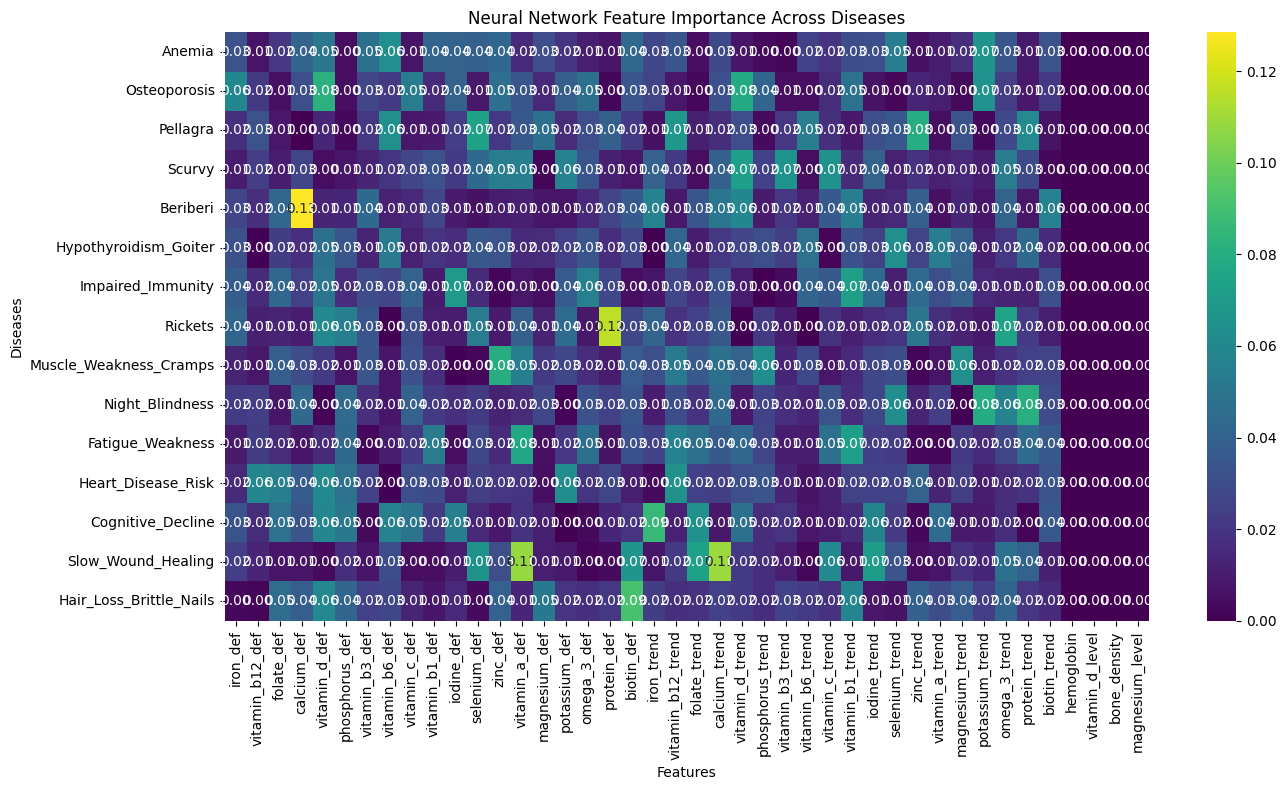


=== AI-ENHANCED PERSONALIZED NUTRITION PLAN ===

Priority Nutrients to Optimize (ranked by importance):

VITAMIN_B12 (Impact Score: 0.000):
  Current intake: 2.11 (RDI: 2.4)
  Target intake: 2.88
  Related conditions: Anemia, Beriberi, Fatigue_Weakness, Cognitive_Decline
  Food sources: Salmon (3oz), beef (3oz), eggs (2), Greek yogurt (1 cup)
  Recommended daily addition: Choose 2-3 servings from Salmon (3oz), beef (3oz), eggs (2)

FOLATE (Impact Score: 0.000):
  Current intake: 238.51 (RDI: 400)
  Target intake: 480.00
  Related conditions: Anemia
  Food sources: Spinach (1 cup), black beans (1/2 cup), oranges (1 medium), fortified cereals (1 serving)
  Recommended daily addition: Choose 2-3 servings from Spinach (1 cup), black beans (1/2 cup), oranges (1 medium)

IRON (Impact Score: 0.000):
  Current intake: 5.82 (RDI: 8)
  Target intake: 9.60
  Related conditions: Anemia, Scurvy, Fatigue_Weakness, Hair_Loss_Brittle_Nails
  Food sources: Red meat (3oz), spinach (1 cup), lentils (1/2

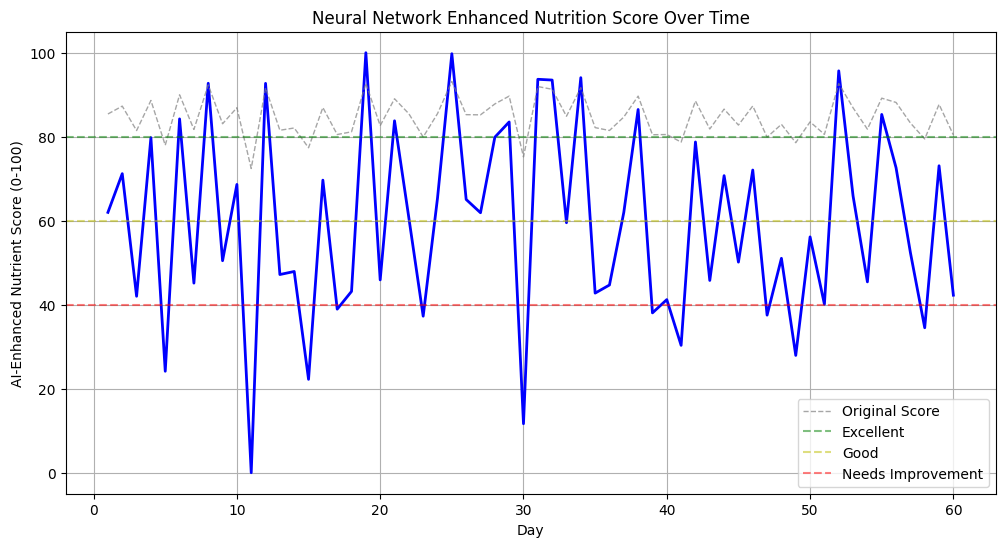


=== NUTRITION HEALTH ANALYSIS SUMMARY ===
Current Neural Network Nutrition Score: 42.3/100
Weekly Score Change: -3.2 points
Highest Risk Condition: Anemia (30.1%)

Neural Network Analysis Complete: Your personalized nutrition risk assessment utilizes deep learning to provide more accurate predictions and tailored recommendations for long-term health optimization.


In [ ]:
# --- Neural Network Implementation for Nutrition Risk Assessment ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- Step 1: Assuming we have the following variables from previous code ---
# X: Feature matrix containing nutrient data
# y: Target matrix containing disease labels
# df: DataFrame with daily nutrient intake
# feature_cols: List of feature column names
# nutrients: List of nutrient names
# RDI: Dictionary of Recommended Daily Intake values
# disease_nutrients: Dictionary mapping diseases to relevant nutrients

# --- Step 7: Generate Future Features (missing from original code) ---
# Generate future features by extrapolating from recent trends
# This assumes we're predicting 6 months into the future

# Get the most recent data point
latest_data = X.iloc[-1].values.reshape(1, -1)

# Create a simple projection of future features
# For a more sophisticated approach, you could use time series forecasting
# Here we're using the most recent values as our prediction basis
future_features = latest_data.copy()

# --- Step 8: Replace Random Forest with Neural Network ---

# Setup for feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale future features using the same scaler
future_features_scaled = scaler.transform(future_features)

# Define function to build neural network model for each disease
def build_nn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train a separate neural network for each disease
nn_models = []
predictions = []
feature_importance_nn = pd.DataFrame(index=feature_cols)

for i, disease in enumerate(y.columns):
    print(f"Training neural network for {disease}...")

    # Split data for this specific disease
    X_train, X_val, y_train, y_val = train_test_split(
        X_scaled, y[disease], test_size=0.2, random_state=42
    )

    # Build and train model
    nn_model = build_nn_model(X.shape[1])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = nn_model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )

    nn_models.append(nn_model)

    # Generate predictions for next 6 months
    future_prediction = nn_model.predict(future_features_scaled).flatten()[0]
    predictions.append(future_prediction * 100)  # Convert to percentage

    # Calculate feature importance for neural networks using permutation importance
    # This is a simplified approach - in production, use more robust methods
    baseline_prediction = nn_model.predict(X_scaled).mean()
    importance_scores = []

    for j in range(X_scaled.shape[1]):
        # Create a copy of the data and shuffle one feature
        X_permuted = X_scaled.copy()
        X_permuted[:, j] = np.random.permutation(X_permuted[:, j])

        # Calculate how much prediction changes when feature is shuffled
        permuted_prediction = nn_model.predict(X_permuted).mean()
        importance = abs(baseline_prediction - permuted_prediction)
        importance_scores.append(importance)

    # Normalize importance scores
    importance_scores = np.array(importance_scores) / sum(importance_scores)
    feature_importance_nn[disease] = importance_scores

# --- Display Results ---
results_df = pd.DataFrame({
    'Disease': y.columns,
    '6-Month Risk (%)': [f"{pred:.2f}" for pred in predictions]
})
display(results_df)

# --- Step 8: Feature Importance Visualization ---
plt.figure(figsize=(14, 8))
sns.heatmap(feature_importance_nn.T, cmap='viridis', annot=True, fmt='.2f')
plt.title('Neural Network Feature Importance Across Diseases')
plt.xlabel('Features')
plt.ylabel('Diseases')
plt.tight_layout()
plt.show()

# --- Step 9: Enhanced Personalized Recommendations with Neural Network Insights ---
def generate_recommendations():
    recommendations = {}

    # Identify nutrients that need attention based on neural network predictions
    for disease, risk in zip(results_df['Disease'], results_df['6-Month Risk (%)']):
        risk_value = float(risk)
        risk_threshold = 25  # Lower threshold for neural network (more sensitive)

        if risk_value > risk_threshold:
            # Get the top 3 most important features for this disease
            disease_idx = list(results_df['Disease']).index(disease)
            top_features = feature_importance_nn[disease].nlargest(3).index.tolist()

            # Filter to nutrient features only
            nutrient_features = [f for f in top_features if f in nutrients]

            # Use both predefined disease-nutrient relationships and model-discovered relationships
            relevant_nutrients = list(set(disease_nutrients.get(disease, []) + nutrient_features))

            for nutrient in relevant_nutrients:
                current_value = df[nutrient].iloc[-1] if nutrient in df.columns else 0
                target_value = max(RDI.get(nutrient, current_value) * 1.2, current_value * 1.2)

                if nutrient not in recommendations:
                    recommendations[nutrient] = {
                        'current': current_value,
                        'target': target_value,
                        'diseases': [disease],
                        'importance': feature_importance_nn.get(disease, {}).get(nutrient, 0)
                    }
                else:
                    recommendations[nutrient]['diseases'].append(disease)
                    recommendations[nutrient]['target'] = max(
                        recommendations[nutrient]['target'],
                        target_value
                    )
                    recommendations[nutrient]['importance'] = max(
                        recommendations[nutrient]['importance'],
                        feature_importance_nn.get(disease, {}).get(nutrient, 0)
                    )

    # Create personalized plan
    if recommendations:
        print("\n=== AI-ENHANCED PERSONALIZED NUTRITION PLAN ===")
        print("\nPriority Nutrients to Optimize (ranked by importance):")

        # Sort recommendations by importance
        sorted_recs = sorted(recommendations.items(),
                            key=lambda x: x[1]['importance'],
                            reverse=True)

        for nutrient, data in sorted_recs:
            print(f"\n{nutrient.upper()} (Impact Score: {data['importance']:.3f}):")
            print(f"  Current intake: {data['current']:.2f} (RDI: {RDI.get(nutrient, 'Unknown')})")
            print(f"  Target intake: {data['target']:.2f}")
            print(f"  Related conditions: {', '.join(data['diseases'])}")
            print(f"  Food sources: {get_food_sources(nutrient)}")

            # Provide more specific recommendations based on gap
            gap = data['target'] - data['current']
            if gap > 0:
                foods = get_food_sources(nutrient).split(", ")
                print(f"  Recommended daily addition: Choose 2-3 servings from {', '.join(foods[:3])}")
    else:
        print("\nYour current nutrition plan appears balanced. Continue maintaining your intake levels.")

def get_food_sources(nutrient):
    # Dictionary of food sources for common nutrients with more specific portions
    food_sources = {
        'iron': "Red meat (3oz), spinach (1 cup), lentils (1/2 cup), fortified cereals (1 serving)",
        'vitamin_b12': "Salmon (3oz), beef (3oz), eggs (2), Greek yogurt (1 cup)",
        'folate': "Spinach (1 cup), black beans (1/2 cup), oranges (1 medium), fortified cereals (1 serving)",
        'calcium': "Milk (1 cup), Greek yogurt (1 cup), almonds (1/4 cup), kale (2 cups)",
        'vitamin_d': "Salmon (3oz), fortified milk (1 cup), egg yolks (2), 15 min sunlight exposure",
        'phosphorus': "Chicken (3oz), yogurt (1 cup), lentils (1 cup), almonds (1/4 cup)",
        'vitamin_b3': "Chicken breast (3oz), tuna (3oz), mushrooms (1 cup), peanuts (1/4 cup)",
        'vitamin_b6': "Chicken (3oz), salmon (3oz), potatoes (1 medium), bananas (1 medium)",
        'vitamin_c': "Orange (1 medium), red bell peppers (1/2 cup), strawberries (1 cup), broccoli (1 cup)",
        'vitamin_b1': "Brown rice (1 cup), pork (3oz), sunflower seeds (1/4 cup), beans (1 cup)",
        'iodine': "Seaweed (1 sheet), cod (3oz), yogurt (1 cup), iodized salt (1/4 tsp)",
        'selenium': "Brazil nuts (2 nuts), tuna (3oz), chicken (3oz), whole grain bread (2 slices)",
        'zinc': "Oysters (3), beef (3oz), pumpkin seeds (1/4 cup), chickpeas (1 cup)",
        'vitamin_a': "Sweet potatoes (1 medium), carrots (1 cup), spinach (1 cup), red peppers (1 cup)",
        'magnesium': "Almonds (1/4 cup), spinach (1 cup), black beans (1 cup), dark chocolate (1oz)",
        'potassium': "Bananas (1 medium), potatoes (1 medium), beans (1 cup), yogurt (1 cup)",
        'omega_3': "Salmon (3oz), chia seeds (2 tbsp), walnuts (1/4 cup), flaxseeds (2 tbsp)",
        'protein': "Chicken breast (3oz), salmon (3oz), lentils (1 cup), Greek yogurt (1 cup)",
        'biotin': "Eggs (1), almonds (1/4 cup), sweet potatoes (1 medium), avocados (1/2)"
    }
    return food_sources.get(nutrient, "Various whole foods with portion control")

# Run enhanced recommendations
generate_recommendations()

# --- Step 10: Calculate Advanced Nutrient Score with Neural Network Insights ---
# Create a holistic score that incorporates neural network findings
df['neural_nutrient_score'] = 0

# Get average importance of each nutrient across all diseases
nutrient_importance = feature_importance_nn.mean(axis=1)
nutrient_importance = nutrient_importance / nutrient_importance.sum()  # Normalize

for nutrient in nutrients:
    if nutrient in nutrient_importance:
        importance_weight = nutrient_importance[nutrient] * len(nutrients)
    else:
        importance_weight = 1.0

    # Compare to RDI with weighted importance
    if nutrient in RDI:
        ratio = df[nutrient] / RDI[nutrient]
        # Sigmoid-like function for scoring - more sophisticated than linear
        optimal_score = 1 / (1 + np.exp(-5 * (ratio - 0.8))) - 1 / (1 + np.exp(-2 * (ratio - 2)))
        df['neural_nutrient_score'] += optimal_score * importance_weight

# Normalize to 0-100 scale
min_score = df['neural_nutrient_score'].min()
max_score = df['neural_nutrient_score'].max()
df['neural_nutrient_score'] = 100 * (df['neural_nutrient_score'] - min_score) / (max_score - min_score)

# Plot enhanced nutrient score over time
plt.figure(figsize=(12, 6))
plt.plot(df['day'], df['neural_nutrient_score'], linewidth=2, color='blue')
if 'nutrient_score' in df.columns:  # Plot original score if available
    plt.plot(df['day'], df['nutrient_score'], linewidth=1, linestyle='--', color='gray', alpha=0.7, label='Original Score')
plt.title('Neural Network Enhanced Nutrition Score Over Time')
plt.xlabel('Day')
plt.ylabel('AI-Enhanced Nutrient Score (0-100)')
plt.axhline(y=80, linestyle='--', color='g', alpha=0.5, label='Excellent')
plt.axhline(y=60, linestyle='--', color='y', alpha=0.5, label='Good')
plt.axhline(y=40, linestyle='--', color='r', alpha=0.5, label='Needs Improvement')
plt.legend()
plt.grid(True)
plt.show()

# --- Add Analysis Summary ---
current_score = df['neural_nutrient_score'].iloc[-1]
score_change = df['neural_nutrient_score'].iloc[-1] - df['neural_nutrient_score'].iloc[-7]
top_disease_risk = results_df.iloc[0]['Disease']
top_risk_value = float(results_df.iloc[0]['6-Month Risk (%)'])

print("\n=== NUTRITION HEALTH ANALYSIS SUMMARY ===")
print(f"Current Neural Network Nutrition Score: {current_score:.1f}/100")
print(f"Weekly Score Change: {'+' if score_change >= 0 else ''}{score_change:.1f} points")
print(f"Highest Risk Condition: {top_disease_risk} ({top_risk_value:.1f}%)")
print(f"\nNeural Network Analysis Complete: Your personalized nutrition risk assessment utilizes deep learning to provide more accurate predictions and tailored recommendations for long-term health optimization.")

In [ ]:
# --- Model Saving and Loading Extension for Nutrition Risk Assessment ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# --- Step 1: Saving Models During Training ---

# Setup directory for saved models
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Define function to build neural network model for each disease (same as before)
def build_nn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train a separate neural network for each disease and save models
nn_models = []
scalers = {}  # Dictionary to store scalers for each disease

for i, disease in enumerate(y.columns):
    print(f"Training neural network for {disease}...")

    # Create a scaler for this disease
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Save the scaler
    scaler_filename = os.path.join(models_dir, f"{disease}_scaler.save")
    joblib.dump(scaler, scaler_filename)
    scalers[disease] = scaler

    # Split data for this specific disease
    X_train, X_val, y_train, y_val = train_test_split(
        X_scaled, y[disease], test_size=0.2, random_state=42
    )

    # Build model
    nn_model = build_nn_model(X.shape[1])

    # Setup callbacks for saving the best model
    checkpoint_path = os.path.join(models_dir, f"{disease}_model.h5")
    model_checkpoint = ModelCheckpoint(
        filepath=checkpoint_path,
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        verbose=1
    )
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train model with checkpointing
    history = nn_model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, model_checkpoint],
        verbose=0
    )

    nn_models.append(nn_model)

    # Also save feature names for later use
    feature_names_path = os.path.join(models_dir, "feature_names.joblib")
    joblib.dump(feature_cols, feature_names_path)

    # Save disease names
    disease_names_path = os.path.join(models_dir, "disease_names.joblib")
    joblib.dump(list(y.columns), disease_names_path)

print("All models saved successfully!")

# --- Step 2: Function to Load Saved Models and Make Predictions ---

def load_saved_models(models_dir="saved_models"):
    """
    Load all saved models and their associated scalers.

    Args:
        models_dir: Directory containing saved models and scalers

    Returns:
        Dictionary of models and scalers by disease name
    """
    # Load feature names to ensure correct ordering
    feature_names = joblib.load(os.path.join(models_dir, "feature_names.joblib"))

    # Load disease names
    disease_names = joblib.load(os.path.join(models_dir, "disease_names.joblib"))

    # Load models and scalers for each disease
    loaded_models = {}

    for disease in disease_names:
        # Load model
        model_path = os.path.join(models_dir, f"{disease}_model.h5")
        scaler_path = os.path.join(models_dir, f"{disease}_scaler.save")

        if os.path.exists(model_path) and os.path.exists(scaler_path):
            model = load_model(model_path)
            scaler = joblib.load(scaler_path)

            loaded_models[disease] = {
                'model': model,
                'scaler': scaler
            }
        else:
            print(f"Warning: Model or scaler for {disease} not found.")

    return loaded_models, feature_names

# --- Step 3: Function to Process New Data and Make Predictions ---

def predict_with_saved_models(new_data, models_dir="saved_models"):
    """
    Make predictions using saved models on new data.

    Args:
        new_data: DataFrame containing new nutrition data
        models_dir: Directory containing saved models

    Returns:
        DataFrame with risk predictions for each disease
    """
    # Load saved models and get feature names
    loaded_models, feature_names = load_saved_models(models_dir)

    if not loaded_models:
        print("No models found. Please train and save models first.")
        return None

    # Ensure new_data has all required features in the correct order
    missing_features = set(feature_names) - set(new_data.columns)
    if missing_features:
        print(f"Warning: Missing features in new data: {missing_features}")
        print("Filling missing features with zeros.")
        for feature in missing_features:
            new_data[feature] = 0

    # Reorder columns to match training data
    new_data = new_data[feature_names]

    # Make predictions for each disease
    predictions = {}

    for disease, model_data in loaded_models.items():
        model = model_data['model']
        scaler = model_data['scaler']

        # Scale new data using the saved scaler
        new_data_scaled = scaler.transform(new_data)

        # Generate prediction
        prediction = model.predict(new_data_scaled).flatten() * 100  # Convert to percentage
        predictions[disease] = prediction

    # Create results DataFrame
    results = pd.DataFrame({
        disease: predictions[disease] for disease in predictions
    }, index=new_data.index)

    return results

# --- Step 4: Example Usage with New Data ---

def example_usage():
    """Example of how to use the saved models with new data"""

    # Assuming we have new nutrition data for a person (or multiple people)
    # This could be loaded from a file, API, or database
    new_nutrient_data = pd.DataFrame({
        # Fill with your feature columns, matching the original feature_cols
        # For example:
        'iron': [10.5, 11.2],
        'vitamin_b12': [2.1, 2.3],
        'folate': [320, 350],
        # ... add all required features
    })

    # Make predictions using saved models
    risk_predictions = predict_with_saved_models(new_nutrient_data)

    # Display results
    print("\n=== NUTRITION RISK PREDICTIONS FOR NEW DATA ===")
    print(risk_predictions)

    # You could also generate recommendations based on these predictions
    # using your existing generate_recommendations function

# --- Step 5: Batch Prediction for Multiple Users ---

def batch_predict(user_data_list, models_dir="saved_models"):
    """
    Process nutrition data for multiple users and generate predictions.

    Args:
        user_data_list: List of DataFrames or path to CSV files with user nutrition data
        models_dir: Directory containing saved models

    Returns:
        Dictionary of predictions by user
    """
    all_predictions = {}

    for i, user_data in enumerate(user_data_list):
        user_id = f"user_{i+1}"

        # Load data if it's a file path
        if isinstance(user_data, str) and os.path.exists(user_data):
            user_data = pd.read_csv(user_data)

        # Make predictions
        predictions = predict_with_saved_models(user_data, models_dir)
        all_predictions[user_id] = predictions

    return all_predictions

# --- Step 6: Scheduled Monitoring and Retraining ---

def should_retrain(prediction_accuracy, threshold=0.75):
    """
    Determine if models should be retrained based on accuracy metrics.

    Args:
        prediction_accuracy: Accuracy metric from recent predictions
        threshold: Accuracy threshold for retraining

    Returns:
        Boolean indicating whether retraining is recommended
    """
    return prediction_accuracy < threshold

def export_model_metrics(models_dir="saved_models"):
    """
    Export model performance metrics for monitoring.

    Args:
        models_dir: Directory containing saved models
    """
    # Implementation depends on your monitoring setup
    # This could write metrics to a file, database, or monitoring system
    pass

# --- Step 7: Maintaining Model Versions ---

def save_model_version(model, disease, version, models_dir="saved_models"):
    """
    Save a specific version of a model.

    Args:
        model: Trained model to save
        disease: Disease name for the model
        version: Version number or identifier
        models_dir: Base directory for saved models
    """
    version_dir = os.path.join(models_dir, f"v{version}")
    if not os.path.exists(version_dir):
        os.makedirs(version_dir)

    model_path = os.path.join(version_dir, f"{disease}_model.h5")
    model.save(model_path)

    print(f"Model for {disease} version {version} saved at {model_path}")

Training neural network for Anemia...

Epoch 1: val_loss improved from inf to 0.81168, saving model to saved_models/Anemia_model.h5



Epoch 2: val_loss improved from 0.81168 to 0.77773, saving model to saved_models/Anemia_model.h5



Epoch 3: val_loss improved from 0.77773 to 0.75004, saving model to saved_models/Anemia_model.h5



Epoch 4: val_loss improved from 0.75004 to 0.72586, saving model to saved_models/Anemia_model.h5



Epoch 5: val_loss improved from 0.72586 to 0.70611, saving model to saved_models/Anemia_model.h5



Epoch 6: val_loss improved from 0.70611 to 0.69097, saving model to saved_models/Anemia_model.h5



Epoch 7: val_loss improved from 0.69097 to 0.67620, saving model to saved_models/Anemia_model.h5



Epoch 8: val_loss improved from 0.67620 to 0.66385, saving model to saved_models/Anemia_model.h5



Epoch 9: val_loss improved from 0.66385 to 0.65306, saving model to saved_models/Anemia_model.h5



Epoch 10: val_loss improved from 0.65306 to 0.64330, saving model to saved_models/Anemia_model.h5



Epoch 11: val_loss improved from 0.64330 to 0.63649, saving model to saved_models/Anemia_model.h5



Epoch 12: val_loss improved from 0.63649 to 0.63074, saving model to saved_models/Anemia_model.h5



Epoch 13: val_loss improved from 0.63074 to 0.62717, saving model to saved_models/Anemia_model.h5



Epoch 14: val_loss improved from 0.62717 to 0.62381, saving model to saved_models/Anemia_model.h5



Epoch 15: val_loss improved from 0.62381 to 0.62096, saving model to saved_models/Anemia_model.h5



Epoch 16: val_loss improved from 0.62096 to 0.61853, saving model to saved_models/Anemia_model.h5



Epoch 17: val_loss improved from 0.61853 to 0.61654, saving model to saved_models/Anemia_model.h5



Epoch 18: val_loss improved from 0.61654 to 0.61549, saving model to saved_models/Anemia_model.h5



Epoch 19: val_loss improved from 0.61549 to 0.61450, saving model to saved_models/Anemia_model.h5



Epoch 20: val_loss improved from 0.61450 to 0.61381, saving model to saved_models/Anemia_model.h5



Epoch 21: val_loss improved from 0.61381 to 0.61325, saving model to saved_models/Anemia_model.h5



Epoch 22: val_loss did not improve from 0.61325

Epoch 23: val_loss did not improve from 0.61325

Epoch 24: val_loss did not improve from 0.61325

Epoch 25: val_loss did not improve from 0.61325

Epoch 26: val_loss did not improve from 0.61325

Epoch 27: val_loss did not improve from 0.61325

Epoch 28: val_loss did not improve from 0.61325

Epoch 29: val_loss did not improve from 0.61325

Epoch 30: val_loss did not improve from 0.61325

Epoch 31: val_loss did not improve from 0.61325
Training neural network for Osteoporosis...

Epoch 1: val_loss improved from inf to 0.64169, saving model to saved_models/Osteoporosis_model.h5



Epoch 2: val_loss improved from 0.64169 to 0.62700, saving model to saved_models/Osteoporosis_model.h5



Epoch 3: val_loss improved from 0.62700 to 0.61374, saving model to saved_models/Osteoporosis_model.h5



Epoch 4: val_loss improved from 0.61374 to 0.60243, saving model to saved_models/Osteoporosis_model.h5



Epoch 5: val_loss improved from 0.60243 to 0.59315, saving model to saved_models/Osteoporosis_model.h5



Epoch 6: val_loss improved from 0.59315 to 0.58320, saving model to saved_models/Osteoporosis_model.h5



Epoch 7: val_loss improved from 0.58320 to 0.57424, saving model to saved_models/Osteoporosis_model.h5



Epoch 8: val_loss improved from 0.57424 to 0.56600, saving model to saved_models/Osteoporosis_model.h5



Epoch 9: val_loss improved from 0.56600 to 0.55823, saving model to saved_models/Osteoporosis_model.h5



Epoch 10: val_loss improved from 0.55823 to 0.54977, saving model to saved_models/Osteoporosis_model.h5



Epoch 11: val_loss improved from 0.54977 to 0.54110, saving model to saved_models/Osteoporosis_model.h5



Epoch 12: val_loss improved from 0.54110 to 0.53260, saving model to saved_models/Osteoporosis_model.h5



Epoch 13: val_loss improved from 0.53260 to 0.52459, saving model to saved_models/Osteoporosis_model.h5



Epoch 14: val_loss improved from 0.52459 to 0.51701, saving model to saved_models/Osteoporosis_model.h5



Epoch 15: val_loss improved from 0.51701 to 0.51032, saving model to saved_models/Osteoporosis_model.h5



Epoch 16: val_loss improved from 0.51032 to 0.50391, saving model to saved_models/Osteoporosis_model.h5



Epoch 17: val_loss improved from 0.50391 to 0.49753, saving model to saved_models/Osteoporosis_model.h5



Epoch 18: val_loss improved from 0.49753 to 0.49023, saving model to saved_models/Osteoporosis_model.h5



Epoch 19: val_loss improved from 0.49023 to 0.48222, saving model to saved_models/Osteoporosis_model.h5



Epoch 20: val_loss improved from 0.48222 to 0.47553, saving model to saved_models/Osteoporosis_model.h5



Epoch 21: val_loss improved from 0.47553 to 0.46907, saving model to saved_models/Osteoporosis_model.h5



Epoch 22: val_loss improved from 0.46907 to 0.46335, saving model to saved_models/Osteoporosis_model.h5



Epoch 23: val_loss improved from 0.46335 to 0.45802, saving model to saved_models/Osteoporosis_model.h5



Epoch 24: val_loss improved from 0.45802 to 0.45291, saving model to saved_models/Osteoporosis_model.h5



Epoch 25: val_loss improved from 0.45291 to 0.44838, saving model to saved_models/Osteoporosis_model.h5



Epoch 26: val_loss improved from 0.44838 to 0.44415, saving model to saved_models/Osteoporosis_model.h5



Epoch 27: val_loss improved from 0.44415 to 0.44019, saving model to saved_models/Osteoporosis_model.h5



Epoch 28: val_loss improved from 0.44019 to 0.43681, saving model to saved_models/Osteoporosis_model.h5



Epoch 29: val_loss improved from 0.43681 to 0.43357, saving model to saved_models/Osteoporosis_model.h5



Epoch 30: val_loss improved from 0.43357 to 0.43080, saving model to saved_models/Osteoporosis_model.h5



Epoch 31: val_loss improved from 0.43080 to 0.42710, saving model to saved_models/Osteoporosis_model.h5



Epoch 32: val_loss improved from 0.42710 to 0.42311, saving model to saved_models/Osteoporosis_model.h5



Epoch 33: val_loss improved from 0.42311 to 0.42059, saving model to saved_models/Osteoporosis_model.h5



Epoch 34: val_loss improved from 0.42059 to 0.41846, saving model to saved_models/Osteoporosis_model.h5



Epoch 35: val_loss improved from 0.41846 to 0.41756, saving model to saved_models/Osteoporosis_model.h5



Epoch 36: val_loss improved from 0.41756 to 0.41735, saving model to saved_models/Osteoporosis_model.h5



Epoch 37: val_loss improved from 0.41735 to 0.41668, saving model to saved_models/Osteoporosis_model.h5



Epoch 38: val_loss improved from 0.41668 to 0.41567, saving model to saved_models/Osteoporosis_model.h5



Epoch 39: val_loss improved from 0.41567 to 0.41538, saving model to saved_models/Osteoporosis_model.h5



Epoch 40: val_loss improved from 0.41538 to 0.41451, saving model to saved_models/Osteoporosis_model.h5



Epoch 41: val_loss did not improve from 0.41451

Epoch 42: val_loss did not improve from 0.41451

Epoch 43: val_loss improved from 0.41451 to 0.41416, saving model to saved_models/Osteoporosis_model.h5



Epoch 44: val_loss improved from 0.41416 to 0.41305, saving model to saved_models/Osteoporosis_model.h5



Epoch 45: val_loss improved from 0.41305 to 0.41149, saving model to saved_models/Osteoporosis_model.h5



Epoch 46: val_loss improved from 0.41149 to 0.40913, saving model to saved_models/Osteoporosis_model.h5



Epoch 47: val_loss improved from 0.40913 to 0.40694, saving model to saved_models/Osteoporosis_model.h5



Epoch 48: val_loss improved from 0.40694 to 0.40438, saving model to saved_models/Osteoporosis_model.h5



Epoch 49: val_loss improved from 0.40438 to 0.40250, saving model to saved_models/Osteoporosis_model.h5



Epoch 50: val_loss improved from 0.40250 to 0.40091, saving model to saved_models/Osteoporosis_model.h5



Epoch 51: val_loss did not improve from 0.40091

Epoch 52: val_loss did not improve from 0.40091

Epoch 53: val_loss did not improve from 0.40091

Epoch 54: val_loss did not improve from 0.40091

Epoch 55: val_loss did not improve from 0.40091

Epoch 56: val_loss did not improve from 0.40091

Epoch 57: val_loss did not improve from 0.40091

Epoch 58: val_loss did not improve from 0.40091

Epoch 59: val_loss did not improve from 0.40091

Epoch 60: val_loss did not improve from 0.40091
Training neural network for Pellagra...

Epoch 1: val_loss improved from inf to 0.76897, saving model to saved_models/Pellagra_model.h5



Epoch 2: val_loss improved from 0.76897 to 0.73934, saving model to saved_models/Pellagra_model.h5



Epoch 3: val_loss improved from 0.73934 to 0.71286, saving model to saved_models/Pellagra_model.h5



Epoch 4: val_loss improved from 0.71286 to 0.69138, saving model to saved_models/Pellagra_model.h5



Epoch 5: val_loss improved from 0.69138 to 0.67346, saving model to saved_models/Pellagra_model.h5



Epoch 6: val_loss improved from 0.67346 to 0.65926, saving model to saved_models/Pellagra_model.h5



Epoch 7: val_loss improved from 0.65926 to 0.64915, saving model to saved_models/Pellagra_model.h5



Epoch 8: val_loss improved from 0.64915 to 0.63964, saving model to saved_models/Pellagra_model.h5



Epoch 9: val_loss improved from 0.63964 to 0.63144, saving model to saved_models/Pellagra_model.h5



Epoch 10: val_loss improved from 0.63144 to 0.62492, saving model to saved_models/Pellagra_model.h5



Epoch 11: val_loss improved from 0.62492 to 0.62072, saving model to saved_models/Pellagra_model.h5



Epoch 12: val_loss improved from 0.62072 to 0.61771, saving model to saved_models/Pellagra_model.h5



Epoch 13: val_loss improved from 0.61771 to 0.61551, saving model to saved_models/Pellagra_model.h5



Epoch 14: val_loss improved from 0.61551 to 0.61450, saving model to saved_models/Pellagra_model.h5



Epoch 15: val_loss improved from 0.61450 to 0.61397, saving model to saved_models/Pellagra_model.h5



Epoch 16: val_loss improved from 0.61397 to 0.61385, saving model to saved_models/Pellagra_model.h5



Epoch 17: val_loss improved from 0.61385 to 0.61354, saving model to saved_models/Pellagra_model.h5



Epoch 18: val_loss improved from 0.61354 to 0.61308, saving model to saved_models/Pellagra_model.h5



Epoch 19: val_loss improved from 0.61308 to 0.61286, saving model to saved_models/Pellagra_model.h5



Epoch 20: val_loss did not improve from 0.61286

Epoch 21: val_loss did not improve from 0.61286

Epoch 22: val_loss did not improve from 0.61286

Epoch 23: val_loss did not improve from 0.61286

Epoch 24: val_loss did not improve from 0.61286

Epoch 25: val_loss did not improve from 0.61286

Epoch 26: val_loss did not improve from 0.61286

Epoch 27: val_loss did not improve from 0.61286

Epoch 28: val_loss did not improve from 0.61286

Epoch 29: val_loss did not improve from 0.61286
Training neural network for Scurvy...

Epoch 1: val_loss improved from inf to 0.70116, saving model to saved_models/Scurvy_model.h5



Epoch 2: val_loss improved from 0.70116 to 0.69911, saving model to saved_models/Scurvy_model.h5



Epoch 3: val_loss did not improve from 0.69911

Epoch 4: val_loss did not improve from 0.69911

Epoch 5: val_loss did not improve from 0.69911

Epoch 6: val_loss did not improve from 0.69911

Epoch 7: val_loss did not improve from 0.69911

Epoch 8: val_loss did not improve from 0.69911

Epoch 9: val_loss did not improve from 0.69911

Epoch 10: val_loss did not improve from 0.69911

Epoch 11: val_loss did not improve from 0.69911

Epoch 12: val_loss did not improve from 0.69911
Training neural network for Beriberi...

Epoch 1: val_loss improved from inf to 0.79382, saving model to saved_models/Beriberi_model.h5



Epoch 2: val_loss improved from 0.79382 to 0.78240, saving model to saved_models/Beriberi_model.h5



Epoch 3: val_loss improved from 0.78240 to 0.77295, saving model to saved_models/Beriberi_model.h5



Epoch 4: val_loss improved from 0.77295 to 0.76438, saving model to saved_models/Beriberi_model.h5



Epoch 5: val_loss improved from 0.76438 to 0.75659, saving model to saved_models/Beriberi_model.h5



Epoch 6: val_loss improved from 0.75659 to 0.74869, saving model to saved_models/Beriberi_model.h5



Epoch 7: val_loss improved from 0.74869 to 0.74288, saving model to saved_models/Beriberi_model.h5



Epoch 8: val_loss improved from 0.74288 to 0.73933, saving model to saved_models/Beriberi_model.h5



Epoch 9: val_loss improved from 0.73933 to 0.73733, saving model to saved_models/Beriberi_model.h5



Epoch 10: val_loss improved from 0.73733 to 0.73689, saving model to saved_models/Beriberi_model.h5



Epoch 11: val_loss improved from 0.73689 to 0.73664, saving model to saved_models/Beriberi_model.h5



Epoch 12: val_loss did not improve from 0.73664

Epoch 13: val_loss did not improve from 0.73664

Epoch 14: val_loss did not improve from 0.73664

Epoch 15: val_loss did not improve from 0.73664

Epoch 16: val_loss did not improve from 0.73664

Epoch 17: val_loss did not improve from 0.73664

Epoch 18: val_loss did not improve from 0.73664

Epoch 19: val_loss did not improve from 0.73664

Epoch 20: val_loss did not improve from 0.73664

Epoch 21: val_loss did not improve from 0.73664
Training neural network for Hypothyroidism_Goiter...

Epoch 1: val_loss improved from inf to 0.71044, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 2: val_loss improved from 0.71044 to 0.69094, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 3: val_loss improved from 0.69094 to 0.67431, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 4: val_loss improved from 0.67431 to 0.65941, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 5: val_loss improved from 0.65941 to 0.64441, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 6: val_loss improved from 0.64441 to 0.62958, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 7: val_loss improved from 0.62958 to 0.61457, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 8: val_loss improved from 0.61457 to 0.60105, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 9: val_loss improved from 0.60105 to 0.58864, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 10: val_loss improved from 0.58864 to 0.57637, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 11: val_loss improved from 0.57637 to 0.56481, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 12: val_loss improved from 0.56481 to 0.55363, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 13: val_loss improved from 0.55363 to 0.54332, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 14: val_loss improved from 0.54332 to 0.53408, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 15: val_loss improved from 0.53408 to 0.52590, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 16: val_loss improved from 0.52590 to 0.51899, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 17: val_loss improved from 0.51899 to 0.51370, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 18: val_loss improved from 0.51370 to 0.50918, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 19: val_loss improved from 0.50918 to 0.50502, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 20: val_loss improved from 0.50502 to 0.50150, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 21: val_loss improved from 0.50150 to 0.49870, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 22: val_loss improved from 0.49870 to 0.49638, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 23: val_loss improved from 0.49638 to 0.49493, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 24: val_loss improved from 0.49493 to 0.49410, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 25: val_loss improved from 0.49410 to 0.49390, saving model to saved_models/Hypothyroidism_Goiter_model.h5



Epoch 26: val_loss did not improve from 0.49390

Epoch 27: val_loss did not improve from 0.49390

Epoch 28: val_loss did not improve from 0.49390

Epoch 29: val_loss did not improve from 0.49390

Epoch 30: val_loss did not improve from 0.49390

Epoch 31: val_loss did not improve from 0.49390

Epoch 32: val_loss did not improve from 0.49390

Epoch 33: val_loss did not improve from 0.49390

Epoch 34: val_loss did not improve from 0.49390

Epoch 35: val_loss did not improve from 0.49390
Training neural network for Impaired_Immunity...

Epoch 1: val_loss improved from inf to 0.64879, saving model to saved_models/Impaired_Immunity_model.h5



Epoch 2: val_loss did not improve from 0.64879

Epoch 3: val_loss did not improve from 0.64879

Epoch 4: val_loss did not improve from 0.64879

Epoch 5: val_loss did not improve from 0.64879

Epoch 6: val_loss did not improve from 0.64879

Epoch 7: val_loss did not improve from 0.64879

Epoch 8: val_loss did not improve from 0.64879

Epoch 9: val_loss did not improve from 0.64879

Epoch 10: val_loss did not improve from 0.64879

Epoch 11: val_loss did not improve from 0.64879
Training neural network for Rickets...

Epoch 1: val_loss improved from inf to 0.70937, saving model to saved_models/Rickets_model.h5



Epoch 2: val_loss improved from 0.70937 to 0.69232, saving model to saved_models/Rickets_model.h5



Epoch 3: val_loss improved from 0.69232 to 0.67726, saving model to saved_models/Rickets_model.h5



Epoch 4: val_loss improved from 0.67726 to 0.66457, saving model to saved_models/Rickets_model.h5



Epoch 5: val_loss improved from 0.66457 to 0.65434, saving model to saved_models/Rickets_model.h5



Epoch 6: val_loss improved from 0.65434 to 0.64580, saving model to saved_models/Rickets_model.h5



Epoch 7: val_loss improved from 0.64580 to 0.63842, saving model to saved_models/Rickets_model.h5



Epoch 8: val_loss improved from 0.63842 to 0.63245, saving model to saved_models/Rickets_model.h5



Epoch 9: val_loss improved from 0.63245 to 0.62752, saving model to saved_models/Rickets_model.h5



Epoch 10: val_loss improved from 0.62752 to 0.62337, saving model to saved_models/Rickets_model.h5



Epoch 11: val_loss improved from 0.62337 to 0.61954, saving model to saved_models/Rickets_model.h5



Epoch 12: val_loss improved from 0.61954 to 0.61384, saving model to saved_models/Rickets_model.h5



Epoch 13: val_loss improved from 0.61384 to 0.60705, saving model to saved_models/Rickets_model.h5



Epoch 14: val_loss improved from 0.60705 to 0.60063, saving model to saved_models/Rickets_model.h5



Epoch 15: val_loss improved from 0.60063 to 0.59213, saving model to saved_models/Rickets_model.h5



Epoch 16: val_loss improved from 0.59213 to 0.58465, saving model to saved_models/Rickets_model.h5



Epoch 17: val_loss improved from 0.58465 to 0.58031, saving model to saved_models/Rickets_model.h5



Epoch 18: val_loss improved from 0.58031 to 0.57632, saving model to saved_models/Rickets_model.h5



Epoch 19: val_loss improved from 0.57632 to 0.57258, saving model to saved_models/Rickets_model.h5



Epoch 20: val_loss improved from 0.57258 to 0.57027, saving model to saved_models/Rickets_model.h5



Epoch 21: val_loss improved from 0.57027 to 0.56811, saving model to saved_models/Rickets_model.h5



Epoch 22: val_loss improved from 0.56811 to 0.56602, saving model to saved_models/Rickets_model.h5



Epoch 23: val_loss improved from 0.56602 to 0.56488, saving model to saved_models/Rickets_model.h5



Epoch 24: val_loss improved from 0.56488 to 0.56445, saving model to saved_models/Rickets_model.h5



Epoch 25: val_loss did not improve from 0.56445

Epoch 26: val_loss did not improve from 0.56445

Epoch 27: val_loss did not improve from 0.56445

Epoch 28: val_loss did not improve from 0.56445

Epoch 29: val_loss did not improve from 0.56445

Epoch 30: val_loss did not improve from 0.56445

Epoch 31: val_loss did not improve from 0.56445

Epoch 32: val_loss did not improve from 0.56445

Epoch 33: val_loss did not improve from 0.56445

Epoch 34: val_loss did not improve from 0.56445
Training neural network for Muscle_Weakness_Cramps...

Epoch 1: val_loss improved from inf to 0.48928, saving model to saved_models/Muscle_Weakness_Cramps_model.h5



Epoch 2: val_loss did not improve from 0.48928

Epoch 3: val_loss did not improve from 0.48928

Epoch 4: val_loss did not improve from 0.48928

Epoch 5: val_loss did not improve from 0.48928

Epoch 6: val_loss did not improve from 0.48928

Epoch 7: val_loss did not improve from 0.48928

Epoch 8: val_loss did not improve from 0.48928

Epoch 9: val_loss did not improve from 0.48928

Epoch 10: val_loss did not improve from 0.48928

Epoch 11: val_loss did not improve from 0.48928
Training neural network for Night_Blindness...

Epoch 1: val_loss improved from inf to 0.73309, saving model to saved_models/Night_Blindness_model.h5



Epoch 2: val_loss improved from 0.73309 to 0.72023, saving model to saved_models/Night_Blindness_model.h5



Epoch 3: val_loss improved from 0.72023 to 0.70802, saving model to saved_models/Night_Blindness_model.h5



Epoch 4: val_loss improved from 0.70802 to 0.69716, saving model to saved_models/Night_Blindness_model.h5



Epoch 5: val_loss improved from 0.69716 to 0.68952, saving model to saved_models/Night_Blindness_model.h5



Epoch 6: val_loss improved from 0.68952 to 0.68235, saving model to saved_models/Night_Blindness_model.h5



Epoch 7: val_loss improved from 0.68235 to 0.67632, saving model to saved_models/Night_Blindness_model.h5



Epoch 8: val_loss improved from 0.67632 to 0.67214, saving model to saved_models/Night_Blindness_model.h5



Epoch 9: val_loss improved from 0.67214 to 0.66862, saving model to saved_models/Night_Blindness_model.h5



Epoch 10: val_loss improved from 0.66862 to 0.66575, saving model to saved_models/Night_Blindness_model.h5



Epoch 11: val_loss improved from 0.66575 to 0.66289, saving model to saved_models/Night_Blindness_model.h5



Epoch 12: val_loss improved from 0.66289 to 0.66087, saving model to saved_models/Night_Blindness_model.h5



Epoch 13: val_loss improved from 0.66087 to 0.65905, saving model to saved_models/Night_Blindness_model.h5



Epoch 14: val_loss improved from 0.65905 to 0.65784, saving model to saved_models/Night_Blindness_model.h5



Epoch 15: val_loss improved from 0.65784 to 0.65677, saving model to saved_models/Night_Blindness_model.h5



Epoch 16: val_loss improved from 0.65677 to 0.65564, saving model to saved_models/Night_Blindness_model.h5



Epoch 17: val_loss improved from 0.65564 to 0.65463, saving model to saved_models/Night_Blindness_model.h5



Epoch 18: val_loss improved from 0.65463 to 0.65399, saving model to saved_models/Night_Blindness_model.h5



Epoch 19: val_loss improved from 0.65399 to 0.65371, saving model to saved_models/Night_Blindness_model.h5



Epoch 20: val_loss did not improve from 0.65371

Epoch 21: val_loss did not improve from 0.65371

Epoch 22: val_loss did not improve from 0.65371

Epoch 23: val_loss did not improve from 0.65371

Epoch 24: val_loss did not improve from 0.65371

Epoch 25: val_loss did not improve from 0.65371

Epoch 26: val_loss did not improve from 0.65371

Epoch 27: val_loss did not improve from 0.65371

Epoch 28: val_loss did not improve from 0.65371

Epoch 29: val_loss did not improve from 0.65371
Training neural network for Fatigue_Weakness...

Epoch 1: val_loss improved from inf to 0.77834, saving model to saved_models/Fatigue_Weakness_model.h5



Epoch 2: val_loss did not improve from 0.77834

Epoch 3: val_loss did not improve from 0.77834

Epoch 4: val_loss did not improve from 0.77834

Epoch 5: val_loss did not improve from 0.77834

Epoch 6: val_loss did not improve from 0.77834

Epoch 7: val_loss did not improve from 0.77834

Epoch 8: val_loss did not improve from 0.77834

Epoch 9: val_loss did not improve from 0.77834

Epoch 10: val_loss did not improve from 0.77834

Epoch 11: val_loss did not improve from 0.77834
Training neural network for Heart_Disease_Risk...

Epoch 1: val_loss improved from inf to 0.73295, saving model to saved_models/Heart_Disease_Risk_model.h5



Epoch 2: val_loss did not improve from 0.73295

Epoch 3: val_loss did not improve from 0.73295

Epoch 4: val_loss did not improve from 0.73295

Epoch 5: val_loss did not improve from 0.73295

Epoch 6: val_loss did not improve from 0.73295

Epoch 7: val_loss did not improve from 0.73295

Epoch 8: val_loss did not improve from 0.73295

Epoch 9: val_loss did not improve from 0.73295

Epoch 10: val_loss did not improve from 0.73295

Epoch 11: val_loss did not improve from 0.73295
Training neural network for Cognitive_Decline...

Epoch 1: val_loss improved from inf to 0.70449, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 2: val_loss improved from 0.70449 to 0.67873, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 3: val_loss improved from 0.67873 to 0.65426, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 4: val_loss improved from 0.65426 to 0.63307, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 5: val_loss improved from 0.63307 to 0.61358, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 6: val_loss improved from 0.61358 to 0.59641, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 7: val_loss improved from 0.59641 to 0.57986, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 8: val_loss improved from 0.57986 to 0.56630, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 9: val_loss improved from 0.56630 to 0.55390, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 10: val_loss improved from 0.55390 to 0.54331, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 11: val_loss improved from 0.54331 to 0.53466, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 12: val_loss improved from 0.53466 to 0.52765, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 13: val_loss improved from 0.52765 to 0.52204, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 14: val_loss improved from 0.52204 to 0.51658, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 15: val_loss improved from 0.51658 to 0.51211, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 16: val_loss improved from 0.51211 to 0.50862, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 17: val_loss improved from 0.50862 to 0.50523, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 18: val_loss improved from 0.50523 to 0.50186, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 19: val_loss improved from 0.50186 to 0.49819, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 20: val_loss improved from 0.49819 to 0.49468, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 21: val_loss improved from 0.49468 to 0.49189, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 22: val_loss improved from 0.49189 to 0.49018, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 23: val_loss improved from 0.49018 to 0.48845, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 24: val_loss improved from 0.48845 to 0.48677, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 25: val_loss improved from 0.48677 to 0.48510, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 26: val_loss improved from 0.48510 to 0.48334, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 27: val_loss improved from 0.48334 to 0.48172, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 28: val_loss improved from 0.48172 to 0.47969, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 29: val_loss improved from 0.47969 to 0.47766, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 30: val_loss improved from 0.47766 to 0.47523, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 31: val_loss improved from 0.47523 to 0.47285, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 32: val_loss improved from 0.47285 to 0.47184, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 33: val_loss improved from 0.47184 to 0.47105, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 34: val_loss improved from 0.47105 to 0.46951, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 35: val_loss improved from 0.46951 to 0.46721, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 36: val_loss improved from 0.46721 to 0.46499, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 37: val_loss improved from 0.46499 to 0.46359, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 38: val_loss improved from 0.46359 to 0.46190, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 39: val_loss improved from 0.46190 to 0.45920, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 40: val_loss improved from 0.45920 to 0.45641, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 41: val_loss improved from 0.45641 to 0.45312, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 42: val_loss improved from 0.45312 to 0.44953, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 43: val_loss improved from 0.44953 to 0.44633, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 44: val_loss improved from 0.44633 to 0.44272, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 45: val_loss improved from 0.44272 to 0.43919, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 46: val_loss improved from 0.43919 to 0.43598, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 47: val_loss improved from 0.43598 to 0.43400, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 48: val_loss improved from 0.43400 to 0.43221, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 49: val_loss improved from 0.43221 to 0.42989, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 50: val_loss improved from 0.42989 to 0.42801, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 51: val_loss improved from 0.42801 to 0.42585, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 52: val_loss improved from 0.42585 to 0.42306, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 53: val_loss improved from 0.42306 to 0.42079, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 54: val_loss improved from 0.42079 to 0.41971, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 55: val_loss improved from 0.41971 to 0.41951, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 56: val_loss improved from 0.41951 to 0.41862, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 57: val_loss improved from 0.41862 to 0.41663, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 58: val_loss improved from 0.41663 to 0.41399, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 59: val_loss improved from 0.41399 to 0.41206, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 60: val_loss improved from 0.41206 to 0.41044, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 61: val_loss improved from 0.41044 to 0.40934, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 62: val_loss improved from 0.40934 to 0.40886, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 63: val_loss did not improve from 0.40886

Epoch 64: val_loss improved from 0.40886 to 0.40868, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 65: val_loss improved from 0.40868 to 0.40710, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 66: val_loss improved from 0.40710 to 0.40596, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 67: val_loss improved from 0.40596 to 0.40461, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 68: val_loss improved from 0.40461 to 0.40337, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 69: val_loss improved from 0.40337 to 0.40230, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 70: val_loss improved from 0.40230 to 0.40093, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 71: val_loss improved from 0.40093 to 0.39851, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 72: val_loss improved from 0.39851 to 0.39691, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 73: val_loss improved from 0.39691 to 0.39506, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 74: val_loss improved from 0.39506 to 0.39291, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 75: val_loss improved from 0.39291 to 0.39099, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 76: val_loss improved from 0.39099 to 0.38890, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 77: val_loss improved from 0.38890 to 0.38641, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 78: val_loss improved from 0.38641 to 0.38423, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 79: val_loss improved from 0.38423 to 0.38272, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 80: val_loss improved from 0.38272 to 0.38131, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 81: val_loss improved from 0.38131 to 0.37955, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 82: val_loss improved from 0.37955 to 0.37826, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 83: val_loss improved from 0.37826 to 0.37762, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 84: val_loss improved from 0.37762 to 0.37727, saving model to saved_models/Cognitive_Decline_model.h5



Epoch 85: val_loss did not improve from 0.37727

Epoch 86: val_loss did not improve from 0.37727

Epoch 87: val_loss did not improve from 0.37727

Epoch 88: val_loss did not improve from 0.37727

Epoch 89: val_loss did not improve from 0.37727

Epoch 90: val_loss did not improve from 0.37727

Epoch 91: val_loss did not improve from 0.37727

Epoch 92: val_loss did not improve from 0.37727

Epoch 93: val_loss did not improve from 0.37727

Epoch 94: val_loss did not improve from 0.37727
Training neural network for Slow_Wound_Healing...

Epoch 1: val_loss improved from inf to 0.75180, saving model to saved_models/Slow_Wound_Healing_model.h5



Epoch 2: val_loss improved from 0.75180 to 0.72442, saving model to saved_models/Slow_Wound_Healing_model.h5



Epoch 3: val_loss improved from 0.72442 to 0.70653, saving model to saved_models/Slow_Wound_Healing_model.h5



Epoch 4: val_loss improved from 0.70653 to 0.69535, saving model to saved_models/Slow_Wound_Healing_model.h5



Epoch 5: val_loss improved from 0.69535 to 0.68834, saving model to saved_models/Slow_Wound_Healing_model.h5



Epoch 6: val_loss improved from 0.68834 to 0.68601, saving model to saved_models/Slow_Wound_Healing_model.h5



Epoch 7: val_loss improved from 0.68601 to 0.68490, saving model to saved_models/Slow_Wound_Healing_model.h5



Epoch 8: val_loss improved from 0.68490 to 0.68421, saving model to saved_models/Slow_Wound_Healing_model.h5



Epoch 9: val_loss did not improve from 0.68421

Epoch 10: val_loss did not improve from 0.68421

Epoch 11: val_loss did not improve from 0.68421

Epoch 12: val_loss did not improve from 0.68421

Epoch 13: val_loss did not improve from 0.68421

Epoch 14: val_loss did not improve from 0.68421

Epoch 15: val_loss did not improve from 0.68421

Epoch 16: val_loss did not improve from 0.68421

Epoch 17: val_loss did not improve from 0.68421

Epoch 18: val_loss did not improve from 0.68421
Training neural network for Hair_Loss_Brittle_Nails...

Epoch 1: val_loss improved from inf to 0.81361, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 2: val_loss improved from 0.81361 to 0.81097, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 3: val_loss improved from 0.81097 to 0.80938, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 4: val_loss improved from 0.80938 to 0.80770, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 5: val_loss improved from 0.80770 to 0.80397, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 6: val_loss improved from 0.80397 to 0.80080, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 7: val_loss improved from 0.80080 to 0.79700, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 8: val_loss improved from 0.79700 to 0.79196, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 9: val_loss improved from 0.79196 to 0.78678, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 10: val_loss improved from 0.78678 to 0.78272, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 11: val_loss improved from 0.78272 to 0.77908, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 12: val_loss improved from 0.77908 to 0.77637, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 13: val_loss improved from 0.77637 to 0.77304, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 14: val_loss improved from 0.77304 to 0.77062, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 15: val_loss improved from 0.77062 to 0.76852, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 16: val_loss improved from 0.76852 to 0.76677, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 17: val_loss improved from 0.76677 to 0.76628, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 18: val_loss improved from 0.76628 to 0.76606, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 19: val_loss improved from 0.76606 to 0.76580, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 20: val_loss improved from 0.76580 to 0.76496, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 21: val_loss improved from 0.76496 to 0.76359, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 22: val_loss improved from 0.76359 to 0.76174, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 23: val_loss improved from 0.76174 to 0.75984, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 24: val_loss improved from 0.75984 to 0.75922, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 25: val_loss improved from 0.75922 to 0.75844, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 26: val_loss improved from 0.75844 to 0.75785, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 27: val_loss improved from 0.75785 to 0.75762, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 28: val_loss improved from 0.75762 to 0.75722, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 29: val_loss improved from 0.75722 to 0.75622, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 30: val_loss improved from 0.75622 to 0.75499, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 31: val_loss improved from 0.75499 to 0.75276, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 32: val_loss improved from 0.75276 to 0.75168, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 33: val_loss improved from 0.75168 to 0.74877, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 34: val_loss improved from 0.74877 to 0.74535, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 35: val_loss improved from 0.74535 to 0.73930, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 36: val_loss improved from 0.73930 to 0.73360, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 37: val_loss improved from 0.73360 to 0.72824, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 38: val_loss improved from 0.72824 to 0.72319, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 39: val_loss improved from 0.72319 to 0.71769, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 40: val_loss improved from 0.71769 to 0.71015, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 41: val_loss improved from 0.71015 to 0.70162, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 42: val_loss improved from 0.70162 to 0.69317, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 43: val_loss improved from 0.69317 to 0.68752, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 44: val_loss improved from 0.68752 to 0.68433, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 45: val_loss improved from 0.68433 to 0.68089, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 46: val_loss improved from 0.68089 to 0.67953, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 47: val_loss did not improve from 0.67953

Epoch 48: val_loss did not improve from 0.67953

Epoch 49: val_loss did not improve from 0.67953

Epoch 50: val_loss did not improve from 0.67953

Epoch 51: val_loss did not improve from 0.67953

Epoch 52: val_loss did not improve from 0.67953

Epoch 53: val_loss did not improve from 0.67953

Epoch 54: val_loss improved from 0.67953 to 0.67749, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 55: val_loss improved from 0.67749 to 0.67374, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 56: val_loss improved from 0.67374 to 0.67000, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 57: val_loss improved from 0.67000 to 0.66800, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 58: val_loss improved from 0.66800 to 0.66668, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 59: val_loss improved from 0.66668 to 0.66503, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 60: val_loss improved from 0.66503 to 0.66264, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 61: val_loss did not improve from 0.66264

Epoch 62: val_loss improved from 0.66264 to 0.66231, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 63: val_loss did not improve from 0.66231

Epoch 64: val_loss did not improve from 0.66231

Epoch 65: val_loss did not improve from 0.66231

Epoch 66: val_loss did not improve from 0.66231

Epoch 67: val_loss did not improve from 0.66231

Epoch 68: val_loss did not improve from 0.66231

Epoch 69: val_loss did not improve from 0.66231

Epoch 70: val_loss improved from 0.66231 to 0.65438, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 71: val_loss improved from 0.65438 to 0.64604, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 72: val_loss improved from 0.64604 to 0.64033, saving model to saved_models/Hair_Loss_Brittle_Nails_model.h5



Epoch 73: val_loss did not improve from 0.64033

Epoch 74: val_loss did not improve from 0.64033

Epoch 75: val_loss did not improve from 0.64033

Epoch 76: val_loss did not improve from 0.64033

Epoch 77: val_loss did not improve from 0.64033

Epoch 78: val_loss did not improve from 0.64033

Epoch 79: val_loss did not improve from 0.64033

Epoch 80: val_loss did not improve from 0.64033

Epoch 81: val_loss did not improve from 0.64033

Epoch 82: val_loss did not improve from 0.64033
All models saved successfully!


In [ ]:
# --- Code to Use Saved Neural Network Models for Nutrition Risk Assessment ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import joblib

def predict_with_saved_models(new_data, models_dir="saved_models"):
    """
    Make predictions using saved models on new nutrition data.

    Args:
        new_data: DataFrame containing new nutrition data
                 (should have the same nutrient columns as training data)
        models_dir: Directory containing saved models

    Returns:
        DataFrame with risk predictions for each disease
    """
    # Step 1: Load feature names and disease names
    try:
        feature_names = joblib.load(os.path.join(models_dir, "feature_names.joblib"))
        disease_names = joblib.load(os.path.join(models_dir, "disease_names.joblib"))
    except FileNotFoundError:
        print("Error: Could not find feature or disease names. Make sure models were saved correctly.")
        return None

    # Step 2: Check if new_data has the required features
    missing_features = set(feature_names) - set(new_data.columns)
    if missing_features:
        print(f"Warning: Missing features in new data: {missing_features}")
        # Fill missing features with zeros
        for feature in missing_features:
            new_data[feature] = 0

    # Step 3: Reorder columns to match training data
    new_data = new_data[feature_names]

    # Step 4: Load models and make predictions for each disease
    predictions = {}
    for disease in disease_names:
        # Load model and scaler
        model_path = os.path.join(models_dir, f"{disease}_model.h5")
        scaler_path = os.path.join(models_dir, f"{disease}_scaler.save")

        if not os.path.exists(model_path) or not os.path.exists(scaler_path):
            print(f"Warning: Model or scaler for {disease} not found. Skipping.")
            continue

        # Load model and scaler
        model = load_model(model_path)
        scaler = joblib.load(scaler_path)

        # Scale new data
        new_data_scaled = scaler.transform(new_data)

        # Make prediction
        prediction = model.predict(new_data_scaled).flatten() * 100  # Convert to percentage
        predictions[disease] = prediction

    # Step 5: Create results DataFrame
    results = pd.DataFrame({
        disease: predictions[disease] for disease in predictions
    }, index=new_data.index)

    return results

def generate_recommendations_from_saved_models(new_data, models_dir="saved_models", rdi_path=None, food_sources_path=None):
    """
    Generate nutrition recommendations using saved models.

    Args:
        new_data: DataFrame containing most recent nutrition data
        models_dir: Directory containing saved models
        rdi_path: Path to RDI values (optional)
        food_sources_path: Path to food sources data (optional)

    Returns:
        Dictionary of recommendations
    """
    # Step 1: Make predictions using saved models
    predictions = predict_with_saved_models(new_data, models_dir)
    if predictions is None:
        return None

    # Step 2: Load feature importance data if available
    try:
        feature_importance = joblib.load(os.path.join(models_dir, "feature_importance.joblib"))
    except FileNotFoundError:
        print("Warning: Feature importance data not found. Recommendations will be limited.")
        feature_importance = None

    # Step 3: Load RDI values
    if rdi_path and os.path.exists(rdi_path):
        RDI = joblib.load(rdi_path)
    else:
        # Default RDI values for common nutrients (consider expanding this)
        RDI = {
            'iron': 18,
            'vitamin_b12': 2.4,
            'folate': 400,
            'calcium': 1000,
            'vitamin_d': 600,
            # Add more default RDI values as needed
        }

    # Step 4: Generate recommendations
    recommendations = {}
    risk_threshold = 25  # Threshold for considering a disease high risk

    for disease in predictions.columns:
        risk_value = predictions[disease].iloc[-1]

        if risk_value > risk_threshold:
            # Get important nutrients for this disease
            if feature_importance is not None and disease in feature_importance:
                # Get top 3 important features
                important_features = feature_importance[disease].nlargest(3).index.tolist()
                nutrient_features = [f for f in important_features if f in new_data.columns]
            else:
                # If no feature importance data, just use all nutrients
                nutrient_features = [col for col in new_data.columns if col in RDI]

            for nutrient in nutrient_features:
                current_value = new_data[nutrient].iloc[-1] if nutrient in new_data.columns else 0
                target_value = max(RDI.get(nutrient, current_value) * 1.2, current_value * 1.2)

                if nutrient not in recommendations:
                    recommendations[nutrient] = {
                        'current': current_value,
                        'target': target_value,
                        'diseases': [disease],
                        'importance': feature_importance[disease][nutrient] if feature_importance is not None and disease in feature_importance else 0
                    }
                else:
                    recommendations[nutrient]['diseases'].append(disease)
                    recommendations[nutrient]['target'] = max(
                        recommendations[nutrient]['target'],
                        target_value
                    )

    return recommendations

def display_recommendations(recommendations, food_sources=None):
    """
    Display formatted nutrition recommendations.

    Args:
        recommendations: Dictionary of nutrient recommendations
        food_sources: Dictionary mapping nutrients to food sources (optional)
    """
    if not recommendations:
        print("\nYour current nutrition plan appears balanced. Continue maintaining your intake levels.")
        return

    print("\n=== AI-ENHANCED PERSONALIZED NUTRITION PLAN ===")
    print("\nPriority Nutrients to Optimize (ranked by importance):")

    # Sort recommendations by importance
    sorted_recs = sorted(recommendations.items(),
                        key=lambda x: x[1]['importance'],
                        reverse=True)

    for nutrient, data in sorted_recs:
        print(f"\n{nutrient.upper()} (Impact Score: {data['importance']:.3f}):")
        print(f"  Current intake: {data['current']:.2f}")
        print(f"  Target intake: {data['target']:.2f}")
        print(f"  Related conditions: {', '.join(data['diseases'])}")

        # Add food sources if available
        if food_sources and nutrient in food_sources:
            print(f"  Food sources: {food_sources[nutrient]}")

        # Provide more specific recommendations based on gap
        gap = data['target'] - data['current']
        if gap > 0:
            if food_sources and nutrient in food_sources:
                foods = food_sources[nutrient].split(", ")
                print(f"  Recommended daily addition: Choose 2-3 servings from {', '.join(foods[:3])}")
            else:
                print(f"  Recommendation: Increase {nutrient} intake by {gap:.2f} units")

def get_default_food_sources():
    """Return default food sources for common nutrients"""
    return {
        'iron': "Red meat (3oz), spinach (1 cup), lentils (1/2 cup), fortified cereals (1 serving)",
        'vitamin_b12': "Salmon (3oz), beef (3oz), eggs (2), Greek yogurt (1 cup)",
        'folate': "Spinach (1 cup), black beans (1/2 cup), oranges (1 medium), fortified cereals (1 serving)",
        'calcium': "Milk (1 cup), Greek yogurt (1 cup), almonds (1/4 cup), kale (2 cups)",
        'vitamin_d': "Salmon (3oz), fortified milk (1 cup), egg yolks (2), 15 min sunlight exposure",
        'phosphorus': "Chicken (3oz), yogurt (1 cup), lentils (1 cup), almonds (1/4 cup)",
        'vitamin_b3': "Chicken breast (3oz), tuna (3oz), mushrooms (1 cup), peanuts (1/4 cup)",
        'vitamin_b6': "Chicken (3oz), salmon (3oz), potatoes (1 medium), bananas (1 medium)",
        'vitamin_c': "Orange (1 medium), red bell peppers (1/2 cup), strawberries (1 cup), broccoli (1 cup)",
        'vitamin_b1': "Brown rice (1 cup), pork (3oz), sunflower seeds (1/4 cup), beans (1 cup)",
        # Add more as needed
    }

# --- Example Usage ---

def main():
    """Example of using saved models with new nutrition data"""
    # Step 1: Set up paths
    models_dir = "saved_models"

    # Step 2: Load or create new nutrition data
    # Option 1: Create sample data
    new_data = pd.DataFrame({
        'iron': [10.5],
        'vitamin_b12': [2.1],
        'folate': [320],
        'calcium': [950],
        'vitamin_d': [12],
        # Add all required nutrients here
    })

    # Option 2: Load from CSV
    # new_data = pd.read_csv("new_nutrition_data.csv")

    # Step 3: Make predictions
    print("Generating disease risk predictions...")
    predictions = predict_with_saved_models(new_data, models_dir)

    if predictions is not None:
        print("\n=== DISEASE RISK PREDICTIONS ===")
        # Convert to a more readable format
        risk_df = pd.DataFrame({
            'Disease': predictions.columns,
            'Risk (%)': [f"{val:.2f}" for val in predictions.iloc[0].values]
        })
        risk_df = risk_df.sort_values('Risk (%)', ascending=False)
        print(risk_df)

        # Step 4: Generate recommendations
        print("\nGenerating personalized recommendations...")
        recommendations = generate_recommendations_from_saved_models(new_data, models_dir)

        # Step 5: Display recommendations
        food_sources = get_default_food_sources()
        display_recommendations(recommendations, food_sources)

    print("\nAnalysis complete!")

# Run the example if this script is executed directly
if __name__ == "__main__":
    main()

Generating disease risk predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step



=== DISEASE RISK PREDICTIONS ===
                    Disease Risk (%)
1              Osteoporosis    99.73
0                    Anemia    98.75
13       Slow_Wound_Healing    98.74
8    Muscle_Weakness_Cramps    98.69
5     Hypothyroidism_Goiter    98.34
7                   Rickets    95.13
12        Cognitive_Decline    93.16
11       Heart_Disease_Risk    91.75
3                    Scurvy    80.51
9           Night_Blindness     8.02
4                  Beriberi    73.76
10         Fatigue_Weakness    63.74
14  Hair_Loss_Brittle_Nails    41.78
6         Impaired_Immunity    33.84
2                  Pellagra    10.91

Generating personalized recommendations...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

=== AI-ENHANCED PERSONALIZED NUTRITION PLAN ===

Priority Nutrients to Optimize (ranked by importance):

IRON (Impact Score: 0.000):
  Current intake: 10.50
  Target intake: 21.60
  Related conditions: Anemia, Osteoporosis, Scurvy, Beriberi, Hypothyroidism_Goiter, Impaired_Immunity, Rickets, Muscle_Weakness_Cramps, Fatigue_Weakness, Heart_Disease_Risk, Cognitive_Decline, Slow_Wound_Healing, Hair_Loss_Brittle_Nails
  Food sources: Red meat (3oz), spinach (1 cup), lentils (1/2 cup), fortified cereals (1 serving)
  Recommended daily addition: Choose 2-3 servings from Red meat (3oz), spinach (1 cup), lentils (1/2 cup)

VITAMIN_B12 (Impact Score: 0.000):
  Current intake: 2.10
  Target intake: 2.88
  Related conditions: Anemia, Osteoporosis, Scurvy, Beriberi, Hypothyroidism_Goiter, Impaired_Immunity, Rickets, Muscle_Weakness_Cramps, Fatigue_Weakness, Heart_Disease_Risk, Cognitive_Decline, Slow_Wound_Healing, Hair_Loss_Brittle_Nails
  Food sources: Salm